<h1>
<center>Navid Bahadoran</center>
</h1>
<h1>
<center>Homework 4, due October 6th, 11:59pm</center>
</h1>

<h2>
<center>September 28, 2023</center>
</h2>


1. Implement the TISP variable selection method for classification (as described in
pages 12 of the Regularized Loss course notes), with the hard-thresholding penalty,
(which is described in page 11, where you take $\eta = 0$). Take special care to normalize
each column of the $X$ matrix to have zero mean and variance 1, and to use the
same mean and standard deviation that you used for normalizing the train set also for
normalizing the test set.

**a) Using the Gisette data, train a TISP classifier on the training set, starting with
$w(0) = 0$, with 100 iterations. Find appropriate thresholds $\lambda$ to select approximately
10, 30, 100, 300, 500 features. Plot the train misclassification error vs
iteration number when selecting 30 features. Plot the final train and test misclassification
error vs the number of selected features. Report in a table these
misclassification errors on the training and test set, the corresponding numbers
of selected features and the values of $\lambda$. Also plot the train and test $ROC$ curves
of the obtained model with 100 features. (3 points)**

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [91]:
gisette_train_X_path = Path(r'D:\Pycharm\Courses\STA5635\HW4\Gisette\gisette_train.data')
gisette_train_label_path = Path(r'D:\Pycharm\Courses\STA5635\HW4\Gisette\gisette_train.labels')
gisette_test_X_path = Path(r'D:\Pycharm\Courses\STA5635\HW4\Gisette\gisette_valid.data')
gisette_test_label_path = Path(r'D:\Pycharm\Courses\STA5635\HW4\Gisette\gisette_valid.labels')

In [92]:
gisette_train_X = pd.read_csv(gisette_train_X_path, delimiter=' ', header=None).drop(5000,axis=1)
gisette_train_label=pd.read_csv(gisette_train_label_path, delimiter=' ', header=None)
gisette_test_X = pd.read_csv(gisette_test_X_path, delimiter=' ', header=None).drop(5000,axis=1)
gisette_test_label=pd.read_csv(gisette_test_label_path, delimiter=' ', header=None)

In [93]:
# normalize the variables of the training set to have zero mean and standard deviation 1 
# Also removing the samples with std=0 which degenerate our scaling
sx=np.std(gisette_train_X,axis=0)
filt=sx>0
gisette_train_X=gisette_train_X.to_numpy()[:,filt]
gisette_test_X=gisette_test_X.to_numpy()[:,filt]
mx=np.mean(gisette_train_X,axis=0)
sx=np.std(gisette_train_X,axis=0)
gisette_train_X=(gisette_train_X-mx)/sx
gisette_test_X=(gisette_test_X-mx)/sx

In [94]:
gisette_train_X=np.c_[np.ones(gisette_train_X.shape[0]),gisette_train_X]
gisette_test_X=np.c_[np.ones(gisette_test_X.shape[0]),gisette_test_X]

In [95]:
# convert the labels from-1,1 to 0,1
gisette_train_label.loc[gisette_train_label[0]==-1] = 0
gisette_test_label.loc[gisette_test_label[0]==-1] = 0

In [96]:
gisette_train_label=gisette_train_label.to_numpy()
gisette_test_label=gisette_test_label.to_numpy()

In [97]:
learning_rate=1
features_Lambda={10:0.19,30:0.133,100:0.087954,300:0.053,500:0.03855}
n_sample=len(gisette_train_X)
n_features=len(gisette_train_X[0])
n_iteration=100
w=np.zeros((n_features,1))

In [98]:
def thresh_op(x,L,eta=0):
    res=np.where(np.abs(x)<=L,0,x/(1+eta))
    return res

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
error=[]
w=np.zeros((n_features,1))
for i in range(n_iteration):
    XWT = gisette_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = gisette_train_X.T@(gisette_train_label-prob)
    w = thresh_op(w + (learning_rate/n_sample)*gradient,features_Lambda[30])
    Pred_train = np.where((gisette_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(gisette_train_X@w)/(1+np.exp(gisette_train_X@w))
    error.append(1-accuracy_score(gisette_train_label,Pred_train))   

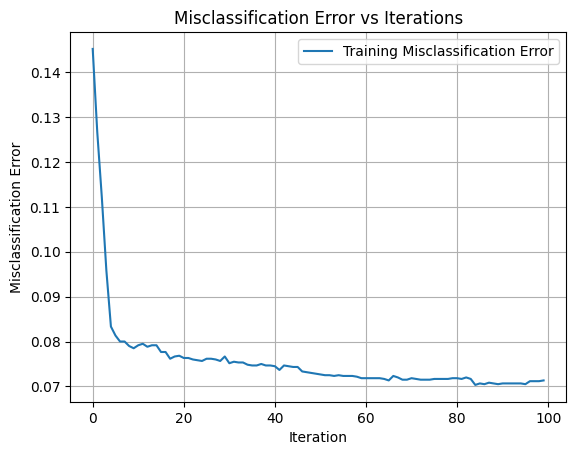

In [101]:
plt.plot(range(n_iteration),error,label='Training Misclassification Error')

plt.title('Misclassification Error vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend();

In [102]:
error_train=[]
error_test=[]
features,thresh_level=list(zip(*features_Lambda.items()))
for j in thresh_level:
    w=np.zeros((n_features,1))
    for i in range(n_iteration):
        XWT = gisette_train_X@w
        exp = np.exp(XWT)
        prob = exp/(1+exp)
        gradient = gisette_train_X.T@(gisette_train_label-prob)
        w = thresh_op(w + (learning_rate/n_sample)*gradient,j)
    Pred_train = np.where((gisette_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(gisette_train_X@w)/(1+np.exp(gisette_train_X@w))
    Pred_test =np.where((gisette_test_X@w)>0,1,0)
    Pred_test_prob = np.exp(gisette_test_X@w)/(1+np.exp(gisette_test_X@w))
    error_train.append(1-accuracy_score(gisette_train_label,Pred_train))
    error_test.append(1-accuracy_score(gisette_test_label,Pred_test))

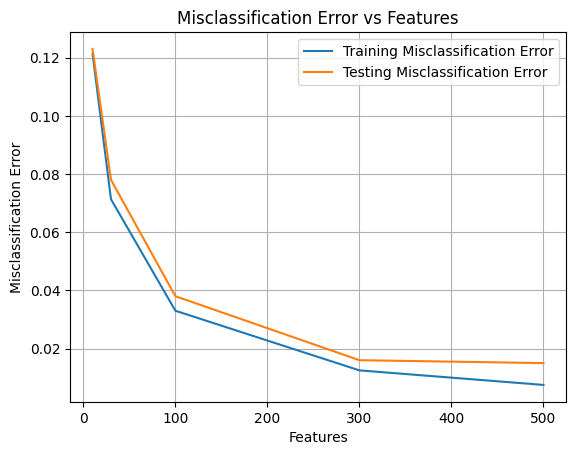

In [103]:
plt.plot(features,error_train,label='Training Misclassification Error')
plt.plot(features,error_test,label='Testing Misclassification Error')
plt.title('Misclassification Error vs Features')
plt.xlabel('Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend();

In [104]:
from IPython.display import HTML
d={'Features':features,'λ':thresh_level,'Training Error':error_train,'Testing Error':error_test}
HTML(pd.DataFrame(d).to_html(index=False))

Features,λ,Training Error,Testing Error
10,0.190000,0.121333,0.123
30,0.133000,0.071333,0.078
100,0.087954,0.033000,0.038
300,0.053000,0.012500,0.016
500,0.038550,0.007500,0.015


In [105]:
w=np.zeros((n_features,1))
for i in range(n_iteration):
    XWT = gisette_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = gisette_train_X.T@(gisette_train_label-prob)
    w = thresh_op(w + (learning_rate/n_sample)*gradient,features_Lambda[100])
    Pred_train = np.where((gisette_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(gisette_train_X@w)/(1+np.exp(gisette_train_X@w))
    Pred_test =np.where((gisette_test_X@w)>0,1,0)
    Pred_test_prob = np.exp(gisette_test_X@w)/(1+np.exp(gisette_test_X@w))

In [106]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(gisette_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(gisette_test_label, Pred_test_prob)

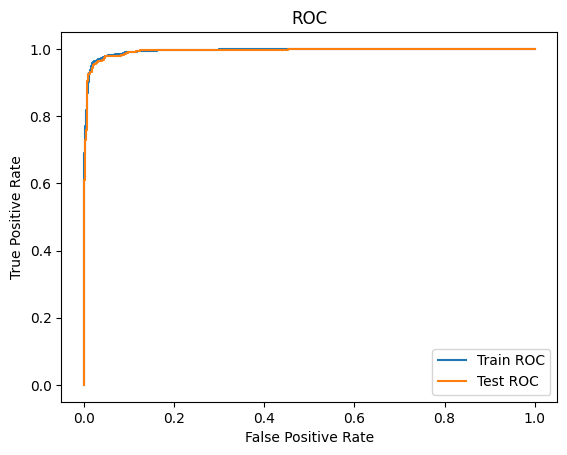

In [107]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend();

In [108]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(gisette_train_label, Pred_train)
auc_score_test = roc_auc_score(gisette_test_label, Pred_test)

In [109]:
from IPython.display import HTML
d={'Train/Test':['Train','Test'],'ROC AUC':[auc_score_train,auc_score_test]}
HTML(pd.DataFrame(d).to_html(index=False))

Train/Test,ROC AUC
Train,0.967
Test,0.962


**b) Repeat point a) on the dexter dataset. (3 points)**

In [110]:
dexter_train_X_path = Path(r'D:/Pycharm/Courses/STA5635/HW4/dexter/dexter_train.csv')
dexter_train_label_path = Path(r'D:/Pycharm/Courses/STA5635/HW4/dexter/dexter_train.labels')
dexter_test_X_path = Path(r'D:/Pycharm/Courses/STA5635/HW4/dexter/dexter_valid.csv')
dexter_test_label_path = Path(r'D:/Pycharm/Courses/STA5635/HW4/dexter/dexter_valid.labels')

In [111]:
dexter_train_X = pd.read_csv(dexter_train_X_path, delimiter=',', header=None)
dexter_train_label=pd.read_csv(dexter_train_label_path, delimiter=',', header=None)
dexter_test_X = pd.read_csv(dexter_test_X_path, delimiter=',', header=None)
dexter_test_label=pd.read_csv(dexter_test_label_path, delimiter=',', header=None)

In [112]:
# normalize the variables of the training set to have zero mean and standard deviation 1 
# Also removing the samples with std=0 which degenerate our scaling
sx=np.std(dexter_train_X,axis=0)
filt=sx>0
dexter_train_X=dexter_train_X.to_numpy()[:,filt]
dexter_test_X=dexter_test_X.to_numpy()[:,filt]
mx=np.mean(dexter_train_X,axis=0)
sx=np.std(dexter_train_X,axis=0)
dexter_train_X=(dexter_train_X-mx)/sx
dexter_test_X=(dexter_test_X-mx)/sx

In [113]:
dexter_train_X=np.c_[np.ones(dexter_train_X.shape[0]),dexter_train_X]
dexter_test_X=np.c_[np.ones(dexter_test_X.shape[0]),dexter_test_X]

In [114]:
dexter_train_label.loc[dexter_train_label[0]==-1] = 0
dexter_test_label.loc[dexter_test_label[0]==-1] = 0

In [115]:
dexter_train_label=dexter_train_label.to_numpy()
dexter_test_label=dexter_test_label.to_numpy()

In [116]:
learning_rate=1
features_Lambda={10:0.14,30:0.099,100:0.07,300:0.0523,500:0.0466}
n_sample=len(dexter_train_X)

n_features=len(dexter_train_X[0])
n_iteration=100
w=np.zeros((n_features,1))

In [117]:
error=[]
w=np.zeros((n_features,1))
for i in range(n_iteration):
    XWT = dexter_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = dexter_train_X.T@(dexter_train_label-prob)
    w = thresh_op(w + (learning_rate/n_sample)*gradient,features_Lambda[30])
    Pred_train = np.where((dexter_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(dexter_train_X@w)/(1+np.exp(dexter_train_X@w))
    error.append(1-accuracy_score(dexter_train_label,Pred_train))    

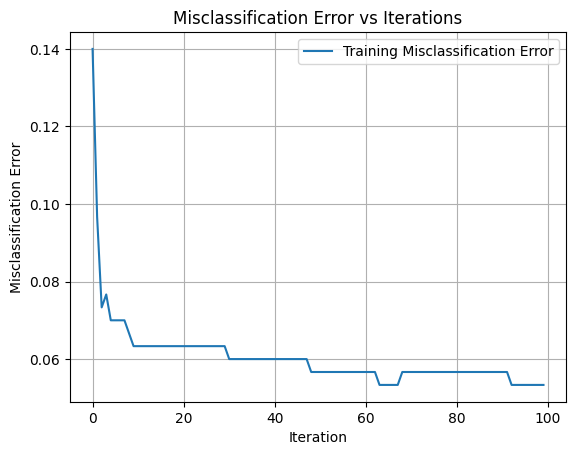

In [118]:
plt.plot(range(n_iteration),error,label='Training Misclassification Error')
plt.title('Misclassification Error vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend();

In [119]:
error_train=[]
error_test=[]
features,thresh_level=list(zip(*features_Lambda.items()))
for j in thresh_level:
    w=np.zeros((n_features,1))
    for i in range(n_iteration):
        XWT =dexter_train_X@w
        exp = np.exp(XWT)
        prob = exp/(1+exp)
        gradient = dexter_train_X.T@(dexter_train_label-prob)
        w = thresh_op(w + (learning_rate/n_sample)*gradient,j)
    Pred_train = np.where((dexter_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(dexter_train_X@w)/(1+np.exp(dexter_train_X@w))
    Pred_test =np.where((dexter_test_X@w)>0,1,0)
    Pred_test_prob = np.exp(dexter_test_X@w)/(1+np.exp(dexter_test_X@w))
    error_train.append(1-accuracy_score(dexter_train_label,Pred_train))
    error_test.append(1-accuracy_score(dexter_test_label,Pred_test))

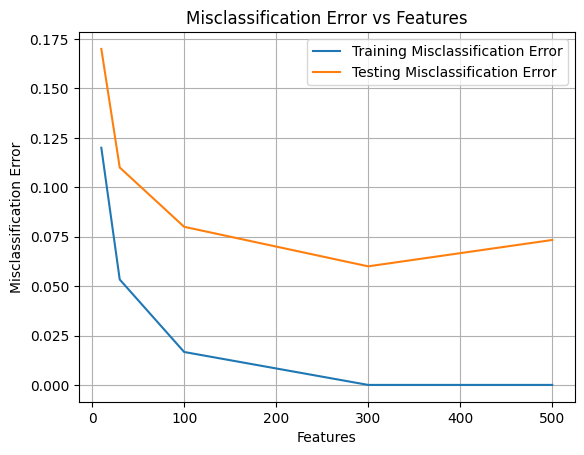

In [120]:
plt.plot(features,error_train,label='Training Misclassification Error')
plt.plot(features,error_test,label='Testing Misclassification Error')
plt.title('Misclassification Error vs Features')
plt.xlabel('Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend();

In [121]:
from IPython.display import HTML
d={'Features':features,'λ':thresh_level,'Training Error':error_train,'Testing Error':error_test}
HTML(pd.DataFrame(d).to_html(index=False))

Features,λ,Training Error,Testing Error
10,0.1400,0.120000,0.170000
30,0.0990,0.053333,0.110000
100,0.0700,0.016667,0.080000
300,0.0523,0.000000,0.060000
500,0.0466,0.000000,0.073333


In [122]:
w=np.zeros((n_features,1))
for i in range(n_iteration):
    XWT = dexter_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = dexter_train_X.T@(dexter_train_label-prob)
    w = thresh_op(w + (learning_rate/n_sample)*gradient,features_Lambda[100])
    Pred_train = np.where((dexter_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(dexter_train_X@w)/(1+np.exp(dexter_train_X@w))
    Pred_test =np.where((dexter_test_X@w)>0,1,0)
    Pred_test_prob = np.exp(dexter_test_X@w)/(1+np.exp(dexter_test_X@w))

In [123]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(dexter_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(dexter_test_label, Pred_test_prob)

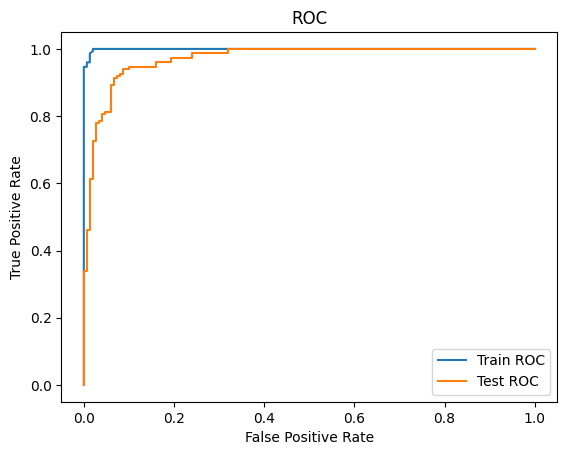

In [124]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend();

In [125]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(dexter_train_label, Pred_train)
auc_score_test = roc_auc_score(dexter_test_label, Pred_test)

In [126]:
from IPython.display import HTML
d={'Train/Test':['Train','Test'],'ROC-AUC':[auc_score_train,auc_score_test]}
HTML(pd.DataFrame(d).to_html(index=False))

Train/Test,ROC-AUC
Train,0.983333
Test,0.920000


**c) Repeat point a) on the madelon dataset. (3 points)**

In [127]:
madelon_train_X_path = Path('D:\Pycharm\Courses\STA5635\HW4\MADELON\madelon_train.data')
madelon_train_label_path = Path('D:\Pycharm\Courses\STA5635\HW4\MADELON\madelon_train.labels')
madelon_test_X_path = Path('D:\Pycharm\Courses\STA5635\HW4\MADELON\madelon_valid.data')
madelon_test_label_path = Path('D:\Pycharm\Courses\STA5635\HW4\MADELON\madelon_valid.labels')

In [128]:
madelon_train_X = pd.read_csv(madelon_train_X_path, delimiter=' ', header=None).drop(500,axis=1)
madelon_train_label = pd.read_csv(madelon_train_label_path, delimiter=' ', header=None)
madelon_test_X = pd.read_csv(madelon_test_X_path, delimiter=' ', header=None).drop(500,axis=1)
madelon_test_label = pd.read_csv(madelon_test_label_path, delimiter=' ', header=None)

In [129]:
# normalize the variables of the training set to have zero mean and standard deviation 1 
# Also removing the samples with std=0 which degenerate our scaling
sx=np.std(madelon_train_X,axis=0)
filt=sx>0
madelon_train_X=madelon_train_X.to_numpy()[:,filt]
madelon_test_X=madelon_test_X.to_numpy()[:,filt]
mx=np.mean(madelon_train_X,axis=0)
sx=np.std(madelon_train_X,axis=0)
madelon_train_X=(madelon_train_X-mx)/sx
madelon_test_X=(madelon_test_X-mx)/sx

In [130]:
madelon_train_X=np.c_[np.ones(madelon_train_X.shape[0]),madelon_train_X]
madelon_test_X=np.c_[np.ones(madelon_test_X.shape[0]),madelon_test_X]

In [131]:
madelon_train_label.loc[madelon_train_label[0]==-1] = 0
madelon_test_label.loc[madelon_test_label[0]==-1] = 0

In [132]:
madelon_train_label=madelon_train_label.to_numpy()
madelon_test_label=madelon_test_label.to_numpy()

In [133]:
learning_rate=1
features_Lambda={10:0.029797,30:0.0245,100:0.017,300:0.00740,500:0}
n_sample=len(madelon_train_X)
n_features=len(madelon_train_X[0])
n_iteration=100
w=np.zeros((n_features,1))

In [134]:
error=[]
w=np.zeros((n_features,1))
for i in range(n_iteration):
    XWT = madelon_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = madelon_train_X.T@(madelon_train_label-prob)
    w = thresh_op(w + (learning_rate/n_sample)*gradient,features_Lambda[30])
    Pred_train = np.where((madelon_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(madelon_train_X@w)/(1+np.exp(madelon_train_X@w))
    error.append(1-accuracy_score(madelon_train_label,Pred_train))  

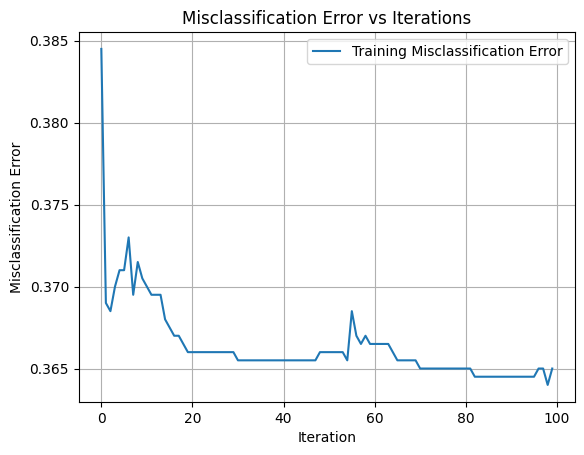

In [135]:
plt.plot(range(n_iteration),error,label='Training Misclassification Error')

plt.title('Misclassification Error vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend();

In [136]:
error_train=[]
error_test=[]
features,thresh_level=list(zip(*features_Lambda.items()))
for j in thresh_level:
    w=np.zeros((n_features,1))
    for i in range(n_iteration):
        XWT =madelon_train_X@w
        exp = np.exp(XWT)
        prob = exp/(1+exp)
        gradient = madelon_train_X.T@(madelon_train_label-prob)
        w = thresh_op(w + (learning_rate/n_sample)*gradient,j)
    Pred_train = np.where((madelon_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(madelon_train_X@w)/(1+np.exp(madelon_train_X@w))
    Pred_test =np.where((madelon_test_X@w)>0,1,0)
    Pred_test_prob = np.exp(madelon_test_X@w)/(1+np.exp(madelon_test_X@w))
    error_train.append(1-accuracy_score(madelon_train_label,Pred_train))
    error_test.append(1-accuracy_score(madelon_test_label,Pred_test))

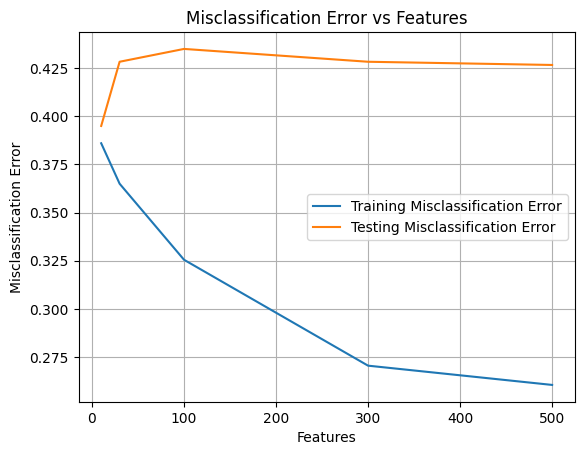

In [137]:
plt.plot(features,error_train,label='Training Misclassification Error')
plt.plot(features,error_test,label='Testing Misclassification Error')
plt.title('Misclassification Error vs Features')
plt.xlabel('Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend();

In [138]:
from IPython.display import HTML
d={'Features':features,'λ':thresh_level,'Training Error':error_train,'Testing Error':error_test}
HTML(pd.DataFrame(d).to_html(index=False))

Features,λ,Training Error,Testing Error
10,0.029797,0.3860,0.395000
30,0.024500,0.3650,0.428333
100,0.017000,0.3255,0.435000
300,0.007400,0.2705,0.428333
500,0.000000,0.2605,0.426667


In [139]:
w=np.zeros((n_features,1))
for i in range(n_iteration):
    XWT = madelon_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = madelon_train_X.T@(madelon_train_label-prob)
    w = thresh_op(w + (learning_rate/n_sample)*gradient,features_Lambda[100])
    Pred_train = np.where((madelon_train_X@w)>0,1,0)
    Pred_train_prob = np.exp(madelon_train_X@w)/(1+np.exp(madelon_train_X@w))
    Pred_test =np.where((madelon_test_X@w)>0,1,0)
    Pred_test_prob = np.exp(madelon_test_X@w)/(1+np.exp(madelon_test_X@w))

In [140]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(madelon_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(madelon_test_label, Pred_test_prob)

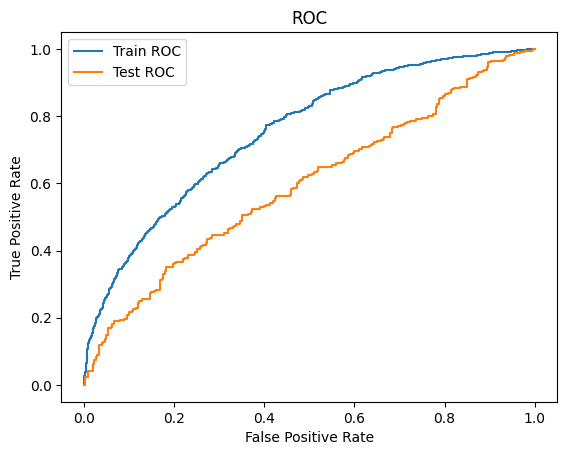

In [141]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend();

In [142]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(madelon_train_label, Pred_train)
auc_score_test = roc_auc_score(madelon_test_label, Pred_test)

In [143]:
from IPython.display import HTML
d={'Train/Test':['Train','Test'],'ROC-AUC':[auc_score_train,auc_score_test]}
HTML(pd.DataFrame(d).to_html(index=False))

Train/Test,ROC-AUC
Train,0.6745
Test,0.5650
